In [1]:
# import local module to track changes
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

First, import the library and create a blank abstract argumentation framework:

# Welcome to the ALIAS Demonstration Notebook!
This Ipython Notebook aims to demonstrate the key functionality of the ALIAS library.

In [2]:
import alias as al
example = al.ArgumentationFramework('Example')

Lets add a few arguments to the framework we've called 'Example':

In [3]:
example.add_argument('a')
example.add_argument('b')
example.add_argument('c')
# Arguments can also be passed as a list or tuple
# e.g: example.add_argument(['a','b,'c'])

Now, lets create some attacks between these arguments:

In [4]:
example.add_attack(('a','b'))
example.add_attack(('b','c'))
# Attacks can also be passed as a list or a tuple 
# by using the optional parameter 'atts'
# e.g: example.add_attack(atts=[('a', 'b'), ('b', 'c')])  

We have created an Argumentation Framework called example which contains three arguments and two attacks.  For a string representation of the Framework, simply call print on it:

In [5]:
print(example)

Argumentation Framework: 
Argument	Attacks	Attacked by
a	|b, 	||
b	|c, 	|a, |
c	|	|b, |



Argument objects belonging to a framework can be referenced by name like so:

In [6]:
arga = example['a']
print(example.get_attackers('b'))
print(arga)

['a']
Argument 'a' : Attacking: [b], Attacked by: []


ALIAS utilises NetworkX's drawing library to provide visual representations of Argumentation Frameworks.  Lets draw our AF 'example' using the `draw_graph()` function:

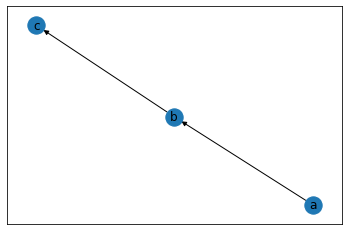

In [7]:
example.draw_graph()

Lets try some extension based semantics.  These functions generate SAT encoding for specified extension and produce the output using SAT solver.

In [8]:
print('Stable: ', example.get_stable_extension())
print('Complete: ', example.get_complete_extension())
print('Preferred: ', example.get_preferred_extension())

Stable:  [['a', 'c']]
Complete:  [['a'], ['a', 'c'], ['b'], ['c']]
Preferred:  [['a', 'c']]


ALIAS can perform file input and output operations on .apx, .dot and .tgf files.  Lets load an aspartix file to demonstrate this functionality.

In [9]:
exampleapx = al.read_apx('example-apx.apx')
print(exampleapx)

Argumentation Framework: 
Argument	Attacks	Attacked by
a	|b, 	||
b	|	|a, c, |
c	|b, 	|d, |
d	|c, 	||



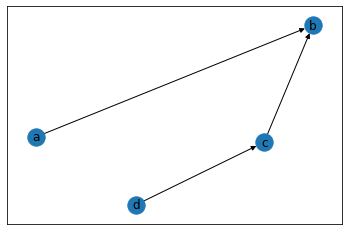

In [10]:
exampleapx.draw_graph()

In [11]:
print('Stable: ', exampleapx.get_stable_extension())
print('Complete: ', exampleapx.get_complete_extension())
print('Preferred: ', exampleapx.get_preferred_extension())

Stable:  [['a', 'd']]
Complete:  [['a'], ['a', 'd'], ['a', 'c'], ['b'], ['b', 'd'], ['c'], ['d']]
Preferred:  [['a', 'd']]
